### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# DP1 Removal of missing data

Consider the dataset dataIsRemovalAllowed which has the following three columns: 
- gender (binary coded) 
- age  
- preference score for a product

The goal is to assess the mean preference for a product (the preference is a score between 0 and 10).

(a) Can rows with missing data be removed without significantly influencing the result?
The answer is NO. Explain graphically, why nonrandom missingness of data here would lead to
an underestimation of the preference score of the product

In [12]:
# importing the dataset
dp1_file = 'dataIsRemovalAllowed.csv'

dp1_df = pd.read_csv(dp1_file)

# while reading the data, we can see that the first column also contains needed data so we fix that by concating a new column and coping the data
new_row = pd.DataFrame({'1': [1], '67': [67], 'NaN':[np.nan]})

dp1_df = pd.concat([new_row, dp1_df], ignore_index=True)

# now we can change the name of the columns
dp1_df.columns = ['gender', 'age', 'preference_score']

### Basic information aboutthe dataset

In [17]:
dp1_df.head(12)

,gender,age,preference_score
0,1,67,NaN
1,0,29,3.3435
2,1,14,2.9387
3,1,44,NaN
4,1,61,NaN
5,1,23,3.7694
6,1,66,NaN
7,0,60,NaN
8,1,37,4.7295
9,1,41,NaN


In [18]:
dp1_df.describe()


,gender,age,preference_score
count,1000.000000,1000.000000,758.000000
mean,0.513000,39.724000,4.530885
std,0.500081,23.207637,1.841698
min,0.000000,1.000000,0.732730
25%,0.000000,19.000000,3.060125
50%,1.000000,40.000000,4.301550
75%,1.000000,60.000000,5.892150
max,1.000000,80.000000,9.316700


From dataset we can see that : 
- age is between 1 and 80
- votes between different genders are distributed equaly
- we have almost 25% of missing data in preference score
- MEAN PREFERENCE SCORE IS 4.53

In [19]:
dp1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1000 non-null   int64  
 1   age               1000 non-null   int64  
 2   preference_score  758 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


### Scatter plot between age and preference score, grouped by gender

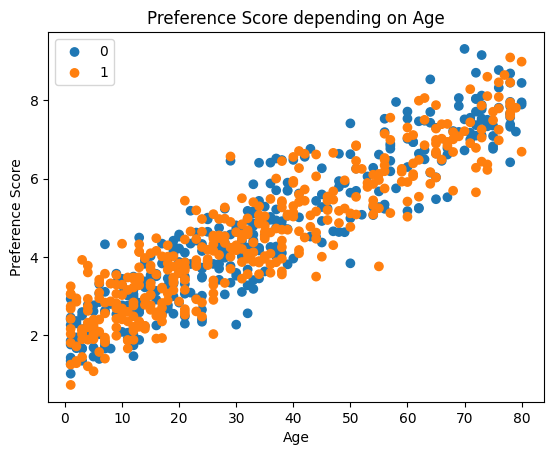

In [25]:
fig, ax = plt.subplots()

groups = dp1_df.groupby('gender')

for name, group in groups:
    ax.scatter(x=group['age'], y=group['preference_score'], marker='o', linestyle='', label=name)

plt.xlabel('Age')
plt.ylabel('Preference Score')
plt.title('Preference Score depending on Age')
plt.legend()
plt.show()

From the plot we can clearly see, that the older the person is the higher tendency it has to give a good score on our product. What is morefrom describing the dataset we can see, that over 25% of stats comes from older people (age above 60)

### Rows with missing data

In [26]:
def get_rows_with_missing_data(dataframe):
    return dataframe[dataframe.isnull().any(axis=1)]

df1_missing = get_rows_with_missing_data(dp1_df)


In [27]:
df1_missing.describe()

,gender,age,preference_score
count,242.000000,242.000000,0.0
mean,0.500000,58.851240,NaN
std,0.501036,11.703573,NaN
min,0.000000,41.000000,NaN
25%,0.000000,48.000000,NaN
50%,0.500000,58.000000,NaN
75%,1.000000,68.000000,NaN
max,1.000000,80.000000,NaN


From this we can see that most of our missing values comes from people above age 58 (old people). That means, if we remove the data instead of fixxing the missing data, we can significantly influence the result and get lower mean value of preference score

### Average score of people above different age groups

In [59]:
def get_average_score_from_age(dataframe, age):
    return dataframe[dataframe['age'] >= age]['preference_score'].mean()

def create_grouped_boxplot(dataframe, x_values, y_values, title=None):
   sns.boxplot(x=x_values, y=y_values, data=dataframe, color='skyblue')
   if title:
       plt.title(title)

def get_average_score_for_every_group_age(dataframe:pd.DataFrame, ages:list):
    return [get_average_score_from_age(dataframe, age) for age in ages]

def show_average_score_for_every_group_age(dataframe:pd.DataFrame, ages:list):
    avg_scores = get_average_score_for_every_group_age(dataframe, ages)
    for score in avg_scores:
        print("Average score for age {} - {}  = {}".format(ages[avg_scores.index(score)] - 10, ages[avg_scores.index(score)], score))


Average score for age 0 - 10  = 4.931374258970359
Average score for age 10 - 20  = 5.440340357852882
Average score for age 20 - 30  = 5.870591326530613
Average score for age 30 - 40  = 6.5117220532319395
Average score for age 40 - 50  = 6.872320895522387
Average score for age 50 - 60  = 7.224664335664335
Average score for age 60 - 70  = 7.632228947368422
Average score for age 70 - 80  = 7.995439999999999


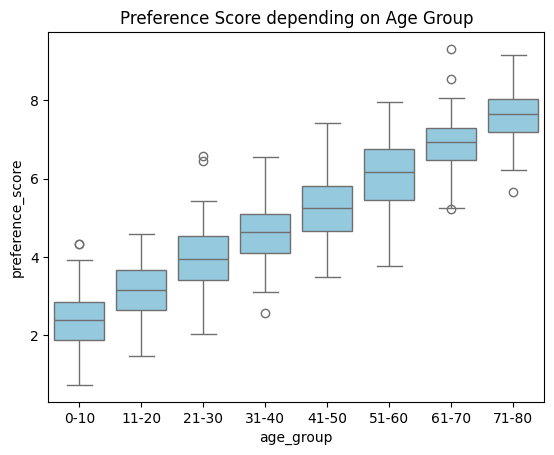

In [60]:
# create a new column with age groups
df1_age_groups = dp1_df.copy()
df1_age_groups['age_group'] = pd.cut(df1_age_groups['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

create_grouped_boxplot(df1_age_groups, 'age_group', 'preference_score', 'Preference Score depending on Age Group')
show_average_score_for_every_group_age(df1_age_groups, [10, 20, 30, 40, 50, 60, 70, 80])

# DP2 Data Imputation for timeseries data

Load the dataset ex22PM10imputation containing timeseries of PM10 values of one year.
The first and the second column contain the same timeseries, but in the first column, 300 values are missing (entries Nan where Nan stands for Not a number). 
The goal is to impute 300 values using different methods and compare them to the real ones (in the second column). Program and apply the following 4 methods for data imputation.

Hint1: the time interval is 30 minutes, so a day consists of 48 values.
Hint2: to make programming easier, values are only missing one at a time, i.e. there are no missing values following each other

(a) Substitute the Nan values by taking the last known value.

(b) Substitute by linear interpolation using the last known and the next known value.

(c) Substitute with the value of the day before at the same time.

(d) Substitute with the mean value of the whole time series (generic method not only applicable for timeseries).

### Reading the data

In [68]:
dp2_file = 'ex22PM10imputation.csv'
dp2_df = pd.read_csv(dp2_file, delimiter=';')

# i also see that the first row contains the column names so I will fix that by adding a new row and copying the data

new_row_ts = pd.DataFrame({'642.2': [642.2], '642.2.1': [642.2]})
dp2_df = pd.concat([new_row_ts, dp2_df ])

# now we can change the name of the columns
dp2_df.columns = ['MissingData', 'RealData']

dp2_df.head(12)

,MissingData,RealData
0,642.2,642.2
0,336.1,336.1
1,242.7,242.7
2,201.1,201.1
3,165.7,165.7
4,120.4,120.4
5,113.4,113.4
6,104.5,104.5
7,93.9,93.9
8,87.9,87.9


### Codes for data_imputation (pandas vs my own to see if there is a difference in computing)

In [108]:
def get_list_of_values_from_column(dataframe, column_name):
    return dataframe[column_name].values.tolist()

def get_average_score_from_data(dataframe, column_name):
    return dataframe[column_name].mean()

def substitute_missing_values_last_known_value(dataframe, column_name):
    column_values = get_list_of_values_from_column(dataframe, column_name)

    new_values = []
    last_known_value = None

    for value in column_values:
        if pd.notna(value):
            new_values.append(value)
            last_known_value = value
        else:
            new_values.append(last_known_value)

    return new_values

def look_for_next_value(column_values, index):
    for i in range(index, len(column_values)):
        if pd.notna(column_values[i]):
            return column_values[i]
    return None

def susbstitute_missing_values_linear_interpolation(dataframe, column_name):
    column_values = get_list_of_values_from_column(dataframe, column_name)

    new_values = []
    last_known_value = None
    next_known_value = None

    for i in range(len(column_values)):
        if pd.notna(column_values[i]):
            new_values.append(column_values[i])
            last_known_value = column_values[i]
            next_known_value = look_for_next_value(column_values, i + 1)
        else:
            linear_interpolation = (last_known_value + next_known_value) / 2
            new_values.append(linear_interpolation)

    return new_values

def substitute_missing_values_from_value_day_before(dataframe, column_name):
    column_values = get_list_of_values_from_column(dataframe, column_name)

    new_values = []
    amount_of_values = len(column_values)

    for i in range(amount_of_values):
        if pd.notna(column_values[i]):
            new_values.append(column_values[i])
        else:
            new_values.append(column_values[i - 48])

    return new_values

def substitute_missing_values__by_mean(dataframe, column_name):
    column_values = get_list_of_values_from_column(dataframe, column_name)

    new_values = []
    mean = get_average_score_from_data(dataframe, column_name)

    for value in column_values:
        if pd.notna(value):
            new_values.append(value)
        else:
            new_values.append(mean)

    return new_values


def calculate_difference_between_means(calculated_mean, real_mean):
    difference = calculated_mean - real_mean
    return difference

In [110]:
average_score_from_RealData = get_average_score_from_data(dp2_df, 'RealData')
average_score_from_MissingData = get_average_score_from_data(dp2_df, 'MissingData')

print("Average score from RealData = {}".format(average_score_from_RealData))
print("Average score from MissingData before interpolation = {}".format(average_score_from_MissingData))

Average score from RealData = 20.867545662100454
Average score from MissingData = 20.859802555168407


### a) Substitute the Nan values by taking the last known value

In [111]:
substituted_values = substitute_missing_values_last_known_value(dp2_df, 'MissingData')
average_score_from_substituted_values_by_last_known = np.mean(substituted_values)
print("Average score from MissingData after substituting missing values by last known value = {}".format(average_score_from_substituted_values_by_last_known))

interpolated_values = dp2_df['MissingData'].ffill(axis=0, inplace=False)
average_score_from_interpolated_values = interpolated_values.mean()
print("Average score from MissingData substituting missing values by last known value  (pandas) = {}".format(average_score_from_interpolated_values))

difference_a = calculate_difference_between_means(average_score_from_substituted_values_by_last_known, average_score_from_RealData)
print("Difference between means from MissingData after substituting missing values by last known value and RealData = {}".format(difference_a))

differenca_a_missing = calculate_difference_between_means(average_score_from_interpolated_values, average_score_from_MissingData)
print("Difference between means from MissingData after substituting missing values by last known value and MissingData before interpolation = {}".format(differenca_a_missing))


Average score from MissingData after substituting missing values by last known value = 20.860028538812784
Average score from MissingData substituting missing values by last known value  (pandas) = 20.860028538812784
Difference between means from MissingData after substituting missing values by last known value and RealData = -0.007517123287669847
Difference between means from MissingData after substituting missing values by last known value and MissingData before interpolation = 0.00022598364437698137


### b) Substitute by linear interpolation using the last known and the next known value.

In [115]:
substituted_values_interpolation = susbstitute_missing_values_linear_interpolation(dp2_df, 'MissingData')
average_score_from_substituted_values_by_interpolation = np.mean(substituted_values_interpolation)
print("Average score from MissingData after substituting missing values by linear interpolation = {}".format(average_score_from_substituted_values_by_interpolation))


interpolated_values_linear = dp2_df['MissingData'].interpolate(method='linear', inplace=False)
average_score_from_interpolated_values_linear = interpolated_values_linear.mean()
print("Average score from MissingData after linear interpolating missing values (pandas) = {}".format(average_score_from_interpolated_values_linear))

difference_b = calculate_difference_between_means(average_score_from_substituted_values_by_interpolation, average_score_from_RealData)
print("Difference between means from MissingData after substituting missing values by last known value and RealData = {}".format(difference_b))

difference_b_missing = calculate_difference_between_means(average_score_from_substituted_values_by_interpolation, average_score_from_MissingData)
print("Difference between means from MissingData after interpolating missing values and MissingData before interpolation = {}".format(difference_b_missing))

Average score from MissingData after substituting missing values by linear interpolation = 20.863581621004567
Average score from MissingData after linear interpolating missing values (pandas) = 20.863581621004567
Difference between means from MissingData after substituting missing values by last known value and RealData = -0.003964041095887438
Difference between means from MissingData after interpolating missing values and MissingData before interpolation = 0.00377906583615939


### c) Substitute with the value of the day before at the same time.


In [118]:
substituted_values_day_before = substitute_missing_values_from_value_day_before(dp2_df, 'MissingData')
average_score_from_substituted_values_by_day_before = np.mean(substituted_values_day_before)
print("Average score from MissingData after substituting missing values by day before value = {}".format(average_score_from_substituted_values_by_day_before))

substituted_values_shifted = dp2_df['MissingData'].fillna(dp2_df['MissingData'].shift(48))
average_score_from_substituted_values_by_shifted = substituted_values_shifted.mean()
print("Average score from MissingData after substituting missing values by shifted value (pandas) = {}".format(average_score_from_substituted_values_by_shifted))

difference_c = calculate_difference_between_means(average_score_from_substituted_values_by_day_before, average_score_from_RealData)
print("Difference between means from MissingData after substituting missing values by day before value and RealData = {}".format(difference_c))

difference_c_missing = calculate_difference_between_means(average_score_from_substituted_values_by_day_before, average_score_from_MissingData)
print("Difference between means from MissingData after substituting missing values by day before value and MissingData before interpolation = {}".format(difference_c_missing))

Average score from MissingData after substituting missing values by day before value = 20.853310502283104
Average score from MissingData after substituting missing values by shifted value (pandas) = 20.853310502283104
Difference between means from MissingData after substituting missing values by day before value and RealData = -0.014235159817349796
Difference between means from MissingData after substituting missing values by day before value and MissingData before interpolation = -0.006492052885302968


### d) Substitute with the mean value of the whole time series (generic method not only applicable for timeseries).

In [119]:
substituted_values_mean = substitute_missing_values__by_mean(dp2_df, 'MissingData')
average_score_from_substituted_values_by_mean = np.mean(substituted_values_mean)
print("Average score from MissingData after substituting missing values by mean = {}".format(average_score_from_substituted_values_by_mean))

mean_substituted_values = dp2_df['MissingData'].fillna(dp2_df['MissingData'].mean())
print("Average score from susbtitution by mean (pandas) = {}".format(mean_substituted_values.mean()))

difference_d = calculate_difference_between_means(average_score_from_substituted_values_by_mean, average_score_from_RealData)
print("Difference between means from MissingData after substituting missing values by mean and RealData = {}".format(difference_d))

difference_d_missing = calculate_difference_between_means(average_score_from_substituted_values_by_mean, average_score_from_MissingData)
print("Difference between means from MissingData after substituting missing values by mean and MissingData before interpolation = {}".format(difference_d_missing))



Average score from MissingData after substituting missing values by mean = 20.85980255516841
Average score from susbtitution by mean (pandas) = 20.85980255516841
Difference between means from MissingData after substituting missing values by mean and RealData = -0.0077431069320432755
Difference between means from MissingData after substituting missing values by mean and MissingData before interpolation = 3.552713678800501e-15


# DP3 Discussion of the data imputation result using EDA

Describe the results of the data imputation example before using EDA. Answer the following questions using appropriate graphics. An important, recurring topic in data analysis is evaluation, especially computation and description of errors: besides choosing suitable graphics (suitable for the question to be answered) one also needs to choose a suitable error measure and often also a reference for sake of comparison.

(a) Which of the 4 data imputation methods is best suited for this timeseries? For the following 3 questions choose this method.

(b) Is the imputation error high? Can it be expected that imputation does not harm the following analysis?

(c) What is the distribution of the imputation error? What is the probability, that the relative error is more than for example 5%? (Hint: you will probably need 2 graphics here)

(d) Plot the whole timeseries and add the imputed data points. We will use this plot to discuss together why this result is not unexpected for this special timeseries and if imputation is expected to harm following analyses or not.

### (a) Which of the 4 data imputation methods is best suited for this timeseries? For the following 3 questions choose this method.

For calculating the error values i will use the RMSE -> Eoot Mean Squared Error

In [183]:
def add_column(dataframe, column_name, column_values):
    dataframe[column_name] = column_values


def calculate_difference_between_values(dataframe, first_column, second_column, name):
    dataframe[name] = dataframe[first_column] - dataframe[second_column]

def calculate_RMSE(dataframe, difference_column):
    return np.sqrt(np.mean(dataframe[difference_column] ** 2))

def plot_difference_line_plot(dataframe, real_data, calculated_data, difference, title):
    plt.plot(dataframe[real_data], label='Real Data', color='blue')
    plt.plot(dataframe[calculated_data], label='Calculated Data', color='lightgreen', linestyle='dashed')
    plt.plot(dataframe[difference], label='Difference', color='red', linestyle='dotted')
    plt.title(title)
    plt.xlabel('Index of the data')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

def plot_difference_line_plot_axes(ax, dataframe, real_data, calculated_data, difference, title):
    ax.plot(dataframe[real_data], label='Real Data', color='blue')
    ax.plot(dataframe[calculated_data], label='Calculated Data', color='lightgreen', linestyle='dashed')
    ax.plot(dataframe[difference], label='Difference', color='red', linestyle='dotted')
    ax.set_title(title)
    ax.set_xlabel('Index of the data')
    ax.set_ylabel('Values')
    ax.legend()

#### I added new columns with calculated values and difference between calculated value and the real value

In [184]:
dp2_copy = dp2_df.copy()

add_column(dp2_copy, 'A', substituted_values)
calculate_difference_between_values(dp2_copy, 'RealData', 'A', 'Difference A')

add_column(dp2_copy, 'B', substituted_values_interpolation)
calculate_difference_between_values(dp2_copy, 'RealData', 'B', 'Difference B')

add_column(dp2_copy, 'C', substituted_values_day_before)
calculate_difference_between_values(dp2_copy, 'RealData', 'C', 'Difference C')

add_column(dp2_copy, 'D', substituted_values_mean)
calculate_difference_between_values(dp2_copy, 'RealData', 'D', 'Difference D')

dp2_copy = dp2_copy[dp2_copy['MissingData'].isna()]
dp2_copy.head(20)

,MissingData,RealData,A,Difference A,B,Difference B,C,Difference C,D,Difference D
98,NaN,15.2,16.2,-1.0,14.70,0.50,32.4,-17.2,20.859803,-5.659803
156,NaN,4.5,5.2,-0.7,4.95,-0.45,9.4,-4.9,20.859803,-16.359803
214,NaN,3.5,3.4,0.1,3.45,0.05,10.3,-6.8,20.859803,-17.359803
272,NaN,4.7,7.8,-3.1,6.70,-2.00,3.3,1.4,20.859803,-16.159803
330,NaN,18.1,16.8,1.3,17.95,0.15,6.8,11.3,20.859803,-2.759803
388,NaN,10.7,11.3,-0.6,14.10,-3.40,14.0,-3.3,20.859803,-10.159803
446,NaN,15.8,14.9,0.9,16.85,-1.05,37.3,-21.5,20.859803,-5.059803
503,NaN,20.4,15.0,5.4,15.75,4.65,7.0,13.4,20.859803,-0.459803
561,NaN,33.7,31.4,2.3,35.05,-1.35,8.5,25.2,20.859803,12.840197
619,NaN,26.1,22.5,3.6,25.35,0.75,40.0,-13.9,20.859803,5.240197


#### Plot line with differences between real data and substituted one and calculate RMSE

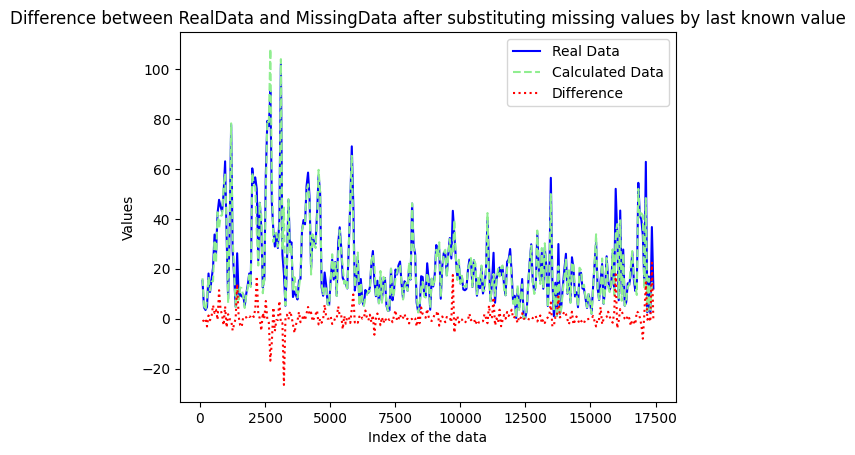

RMSE A = 3.898320151039419


In [185]:
plot_a = plot_difference_line_plot(dp2_copy, 'RealData', 'A', 'Difference A', 'Difference between RealData and MissingData after substituting missing values by last known value')
RMSE_a = calculate_RMSE(dp2_copy, 'Difference A')
print("RMSE A = {}".format(RMSE_a))

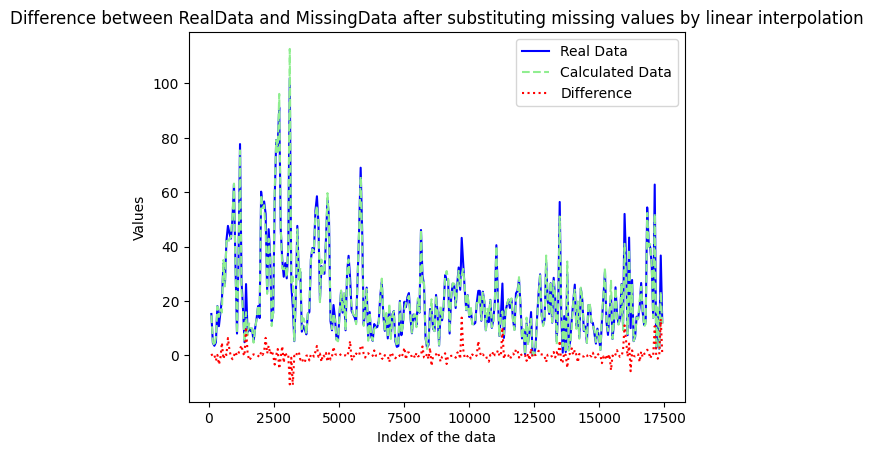

RMSE B = 2.480136084975984


In [186]:
plot_b = plot_difference_line_plot(dp2_copy, 'RealData', 'B', 'Difference B', 'Difference between RealData and MissingData after substituting missing values by linear interpolation')
RMSE_b = calculate_RMSE(dp2_copy, 'Difference B')
print("RMSE B = {}".format(RMSE_b))

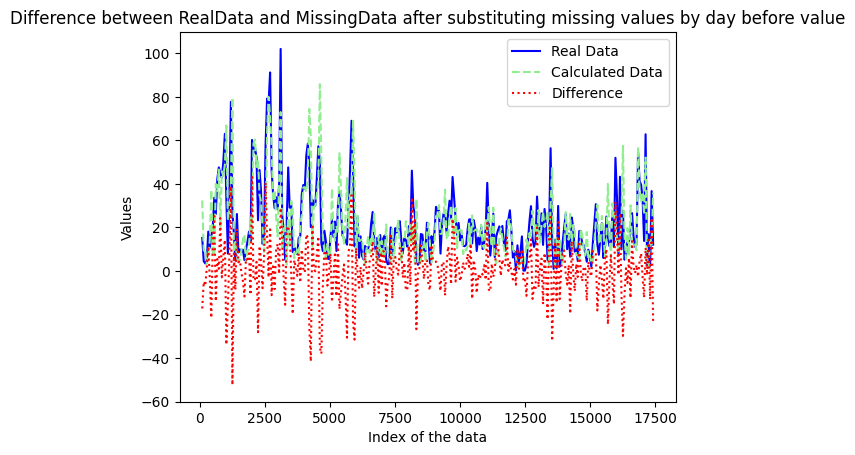

RMSE C = 13.302450901995465


In [187]:
plot_c = plot_difference_line_plot(dp2_copy, 'RealData', 'C', 'Difference C', 'Difference between RealData and MissingData after substituting missing values by day before value')
RMSE_c = calculate_RMSE(dp2_copy, 'Difference C')
print("RMSE C = {}".format(RMSE_c))

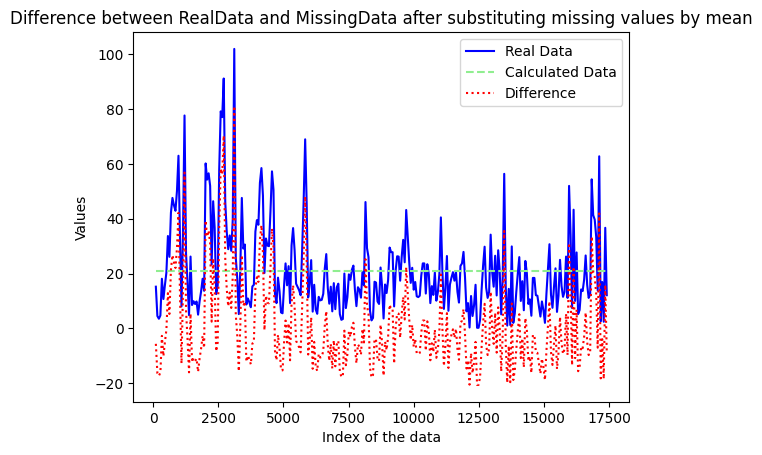

RMSE D = 16.147953591578684


In [188]:
plot_d = plot_difference_line_plot(dp2_copy, 'RealData', 'D', 'Difference D', 'Difference between RealData and MissingData after substituting missing values by mean')
RMSE_d = calculate_RMSE(dp2_copy, 'Difference D')
print("RMSE D = {}".format(RMSE_d))

In [159]:
RMSE_values = [(RMSE_a, "RMSE A :"), (RMSE_b, "RMSE B :"), (RMSE_c, "RMSE C :"), (RMSE_d, "RMSE D :")]

sorted_RMSE = sorted(RMSE_values, key=lambda x: x[0])
for rmse in sorted_RMSE:
    print(rmse[1], rmse[0])

RMSE B : 2.480136084975984
RMSE A : 3.898320151039419
RMSE C : 13.302450901995465
RMSE D : 16.147953591578684


Why RMSE : 

- **Penalty for Larger Deviations**: RMSE gives more weight to larger errors because it squares the differences between the actual and predicted values before averaging. This means that if there are significant discrepancies in your PM10 measurements, RMSE will highlight those more than smaller errors.
- **Critical for Environmental Data**: In air quality measurements, even small errors can be important, but large deviations can indicate significant issues. Using RMSE helps identify when the model is failing in more meaningful ways.
- **Same Units as Original Data**: RMSE is expressed in the same units as the original measurements (in this case, µg/m³ for PM10), which makes it intuitive and easy to interpret. You can directly compare the RMSE value to the measured values of PM10 to assess accuracy.
- **Directional Errors** : Unlike other error metrics like Mean Absolute Error (MAE) or even Mean Error, which might average out positive and negative discrepancies, RMSE focuses solely on the magnitude of errors. This means that if you have a few high positive deviations and some high negative deviations, they do not cancel each other out when calculating RMSE.

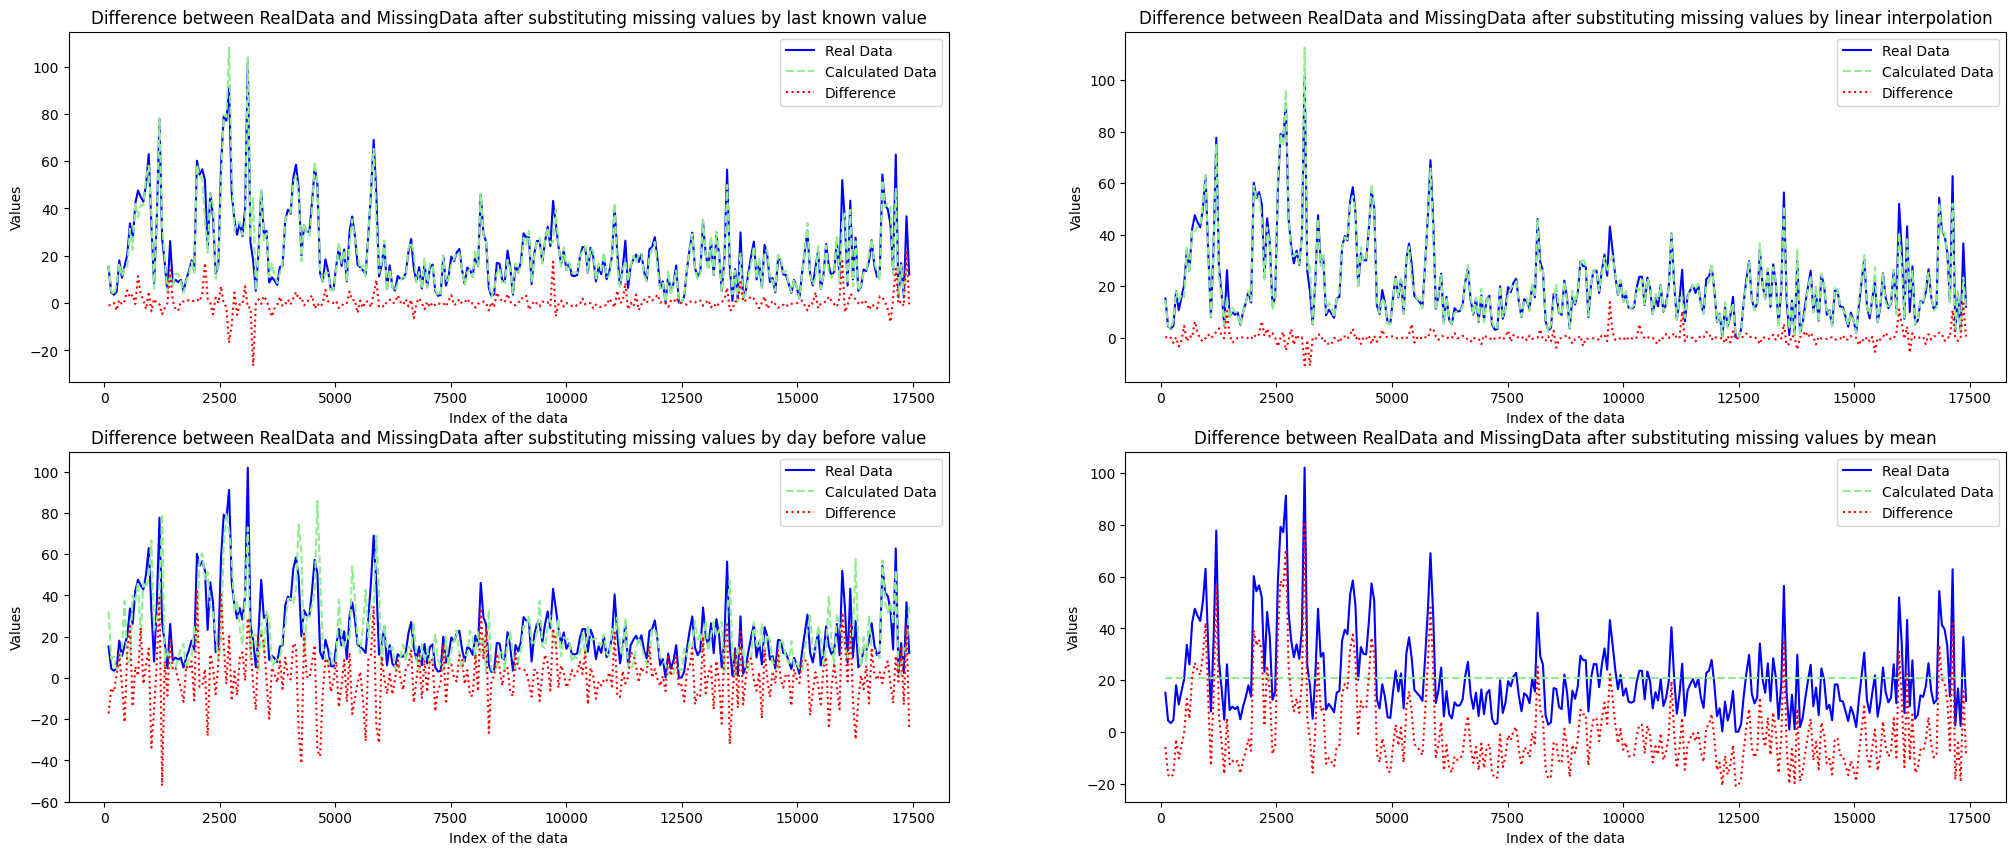

In [190]:
# all four plots in one figure
fig, axs = plt.subplots(2, 2, figsize=(25, 10))

plot_difference_line_plot_axes(axs[0, 0], dp2_copy, 'RealData', 'A', 'Difference A', 'Difference between RealData and MissingData after substituting missing values by last known value')
plot_difference_line_plot_axes(axs[0, 1], dp2_copy, 'RealData', 'B', 'Difference B', 'Difference between RealData and MissingData after substituting missing values by linear interpolation')
plot_difference_line_plot_axes(axs[1, 0], dp2_copy, 'RealData', 'C', 'Difference C', 'Difference between RealData and MissingData after substituting missing values by day before value')
plot_difference_line_plot_axes(axs[1, 1], dp2_copy, 'RealData', 'D', 'Difference D', 'Difference between RealData and MissingData after substituting missing values by mean')

After conducting this type of analysis on the error values, we can conclude that linear interpolation yields the smallest error.

### (b)  Is the imputation error high? Can it be expected that imputation does not harm the following analysis?


In [191]:
RMSE_values = [(RMSE_a, "RMSE A :"), (RMSE_b, "RMSE B :"), (RMSE_c, "RMSE C :"), (RMSE_d, "RMSE D :")]

sorted_RMSE = sorted(RMSE_values, key=lambda x: x[0])
for rmse in sorted_RMSE:
    print(rmse[1], rmse[0])

RMSE B : 2.480136084975984
RMSE A : 3.898320151039419
RMSE C : 13.302450901995465
RMSE D : 16.147953591578684


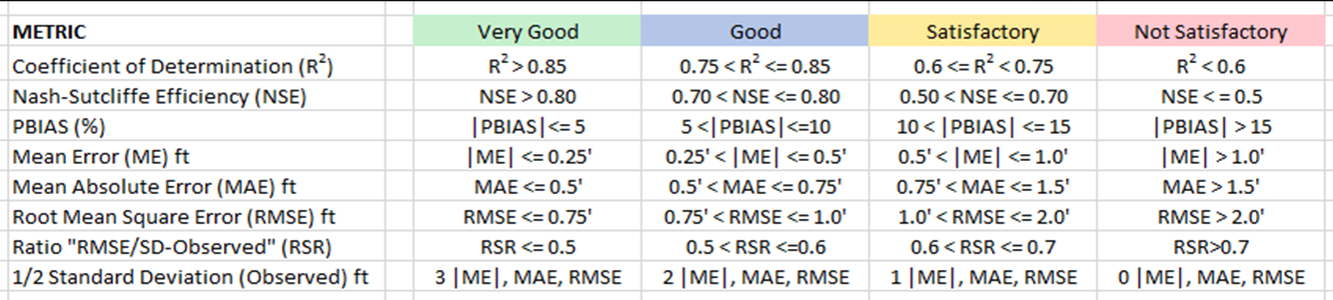

**1. Comparison of RMSE Values:**

- Both methods A and B scored the lowest values for imputation error.

- The errors for methods C and D are significantly higher than those for A and B.

**2. Interpretation of Values:**
- According to information I found online, each of the imputation methods scores well above the acceptable range.

- RMSE C (13.30) and RMSE D (16.15): Both of these values are well above the acceptable threshold, indicating very poor predictive performance. They suggest that the imputation methods employed for these variables are likely to introduce substantial errors and could distort any subsequent analyses.

- RMSE B (2.48): This value is significantly above the acceptable range of 0.2 to 0.5, indicating that while it may show some predictive capability, it is still relatively high for practical accuracy. Therefore, caution is needed when interpreting results based on this imputation method.

- RMSE A (3.90): This value is even higher and indicates a lack of accuracy in predicting the underlying data. It suggests that the model’s predictions might be significantly off, which could lead to misleading conclusions.

- If I had to use one of these methods, I would still choose method B, as it provides the smallest error. However, I would be cautious with this choice, as it could still adversely affect my analysis.

### (c) What is the distribution of the imputation error? What is the probability, that the relative error is more than for example 5%?

In [209]:
def create_histogram_of_error(ax, dataframe, column_name, title):
    # Rule of thumb for number of bins
    n = len(dataframe[column_name])
    bins = int(np.sqrt(n))

    ax.hist(dataframe[column_name], bins=bins, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel('Error')
    ax.set_ylabel('Frequency')

def create_density_plot_of_error(ax, dataframe, column_name, title):
    sns.kdeplot(dataframe[column_name], color='skyblue', fill=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Error')
    ax.set_ylabel('Density')

def show_histogram_and_density_plot(dataframe, column_name, title):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Create the histogram and density plot
    create_histogram_of_error(axs[0], dataframe, column_name, title + ' - Histogram')
    create_density_plot_of_error(axs[1], dataframe, column_name, title + ' - Density Plot')

    plt.tight_layout()
    plt.show()


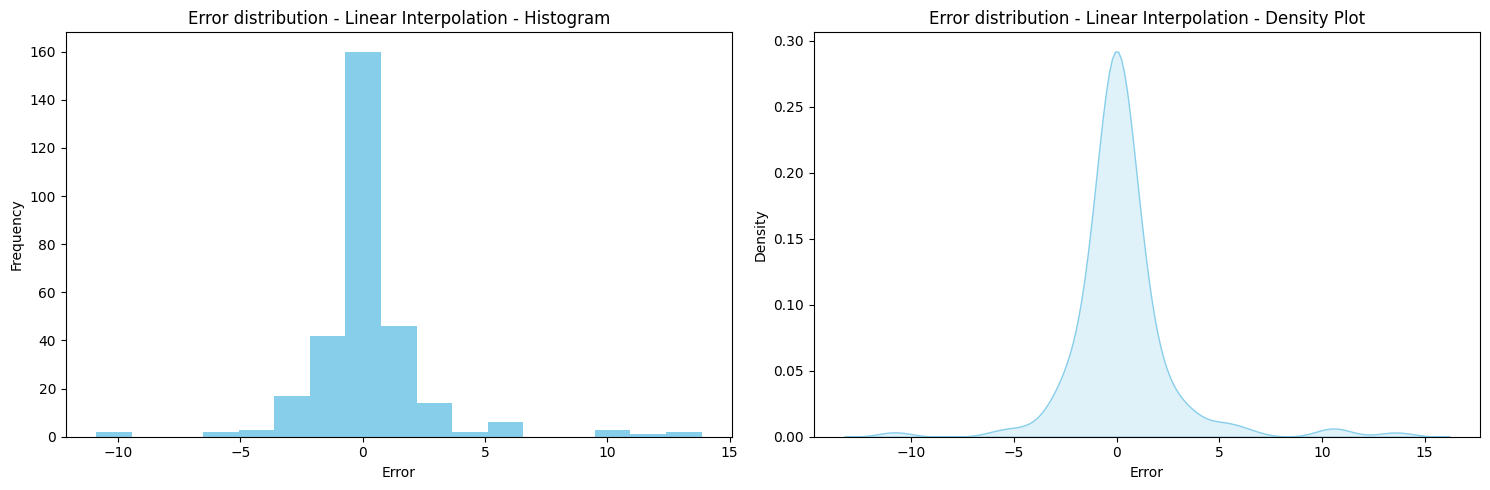

In [210]:
show_histogram_and_density_plot(dp2_copy, 'Difference B', 'Error distribution - Linear Interpolation')

he plotted distribution exhibits a shape resembling a Gaussian (normal) distribution; however, it is characterized by a notable concentration of values within a narrow range, specifically between -5 and 5. This suggests that the majority of data points cluster closely around the central values, resulting in a pronounced peak at the center of the distribution

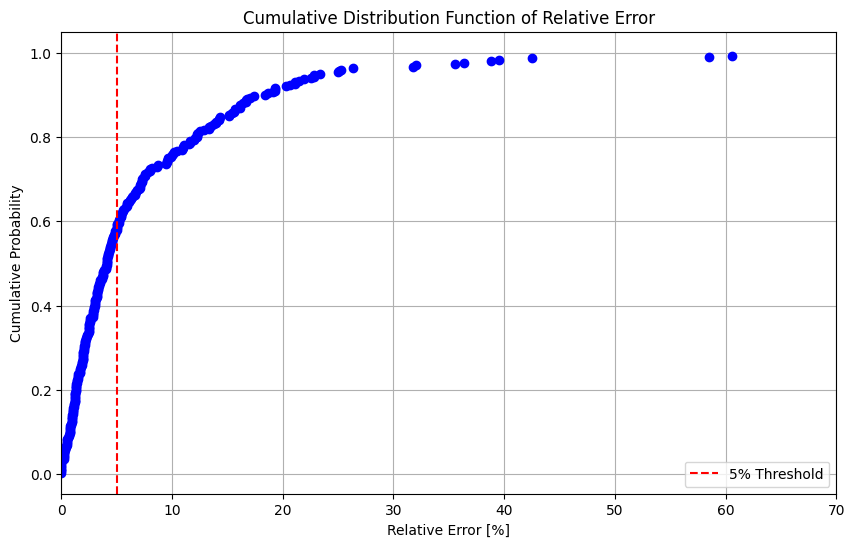

In [269]:
dp2_relative_difference = dp2_copy.copy()

dp2_relative_difference['Relative Difference B'] = (np.abs(dp2_relative_difference['B'] - dp2_relative_difference['RealData']) / dp2_relative_difference['RealData']) * 100

# Step 2: Select the column for the CDF
relative_errors = dp2_relative_difference['Relative Difference B']

# Step 3: Sort the values
sorted_errors = np.sort(relative_errors)

# Step 4: Calculate CDF
cdf = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)

# Step 5: Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_errors, cdf, marker='o', linestyle='none', color='blue')
plt.title('Cumulative Distribution Function of Relative Error')
plt.xlabel('Relative Error [%]')
plt.ylabel('Cumulative Probability')
plt.grid()

# Set x-axis limits to zoom in on values from 0 to 70
plt.xlim(0, 70)

# Optionally, add a line to indicate a specific threshold
threshold = 5  # Example threshold
plt.axvline(x=threshold, color='red', linestyle='--', label='5% Threshold')
plt.legend()

plt.show()

### (d) Plot the whole timeseries and add the imputed data points. We will use this plot to discuss together why this result is not unexpected for this special timeseries and if imputation is expected to harm following analyses or not

In [ ]:
@ TODO

# DP5 Feature selection

Look at https://machinelearningmastery.com/feature-selection-for-regression-data/

Redo the first part of the analysis done there:

(a) Run the code using features selected based on correlation of the feature with the outcome and
explain what is done there.

(b) Run the code using features selected based on the mutual information of the feature and the
outcome and explain what is done there.

(c) The important decision here is to select the number of features k. Do this manually for both methods by running the code with k= 5, 10, 20, 30, 40, 50, 60, 70, 80, 90. Then draw the resulting errors depending on k. Which of the two methods seems to be better? Which k should we select?

### (a) Run the code using features selected based on correlation of the feature with the outcome and explain what is done there.

### (b) Run the code using features selected based on the mutual information of the feature and the outcome and explain what is done there.

In [259]:
# imports
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error
from numpy import mean
from numpy import std
from sklearn.datasets import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline


In [260]:
# loading data and splitting into train and test sets
# we ahve 1000 samples, 100 features and 10 are informative

X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (670, 100) (670,)
Test (330, 100) (330,)


#### Correlation Feature Selection

Correlation is a measure of how two variables change together. Linear correlation scores are typically a value between -1 and 1 with 0 representing no relationship. For feature selection, we are often interested in a positive score with the larger the positive value, the larger the relationship, and, more likely, the feature should be selected for modeling. As such the linear correlation can be converted into a correlation statistic with only positive values.

Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

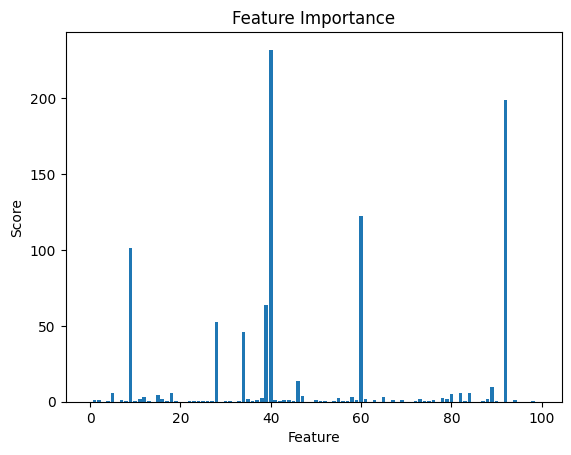

In [272]:
# feature selection we, are selecting k best features (in this case all)
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features (largers score = better feature)
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.title('Feature Importance')
pyplot.xlabel('Feature')
pyplot.ylabel('Score')
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Mutual Information Feature Selection

Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency

Feature 0: 0.045484
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.024816
Feature 5: 0.000000
Feature 6: 0.022659
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.074320
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.020390
Feature 15: 0.004307
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.016566
Feature 19: 0.003688
Feature 20: 0.007579
Feature 21: 0.018640
Feature 22: 0.025206
Feature 23: 0.017967
Feature 24: 0.069173
Feature 25: 0.000000
Feature 26: 0.022232
Feature 27: 0.000000
Feature 28: 0.007849
Feature 29: 0.012849
Feature 30: 0.017402
Feature 31: 0.008083
Feature 32: 0.047321
Feature 33: 0.002829
Feature 34: 0.028968
Feature 35: 0.000000
Feature 36: 0.071652
Feature 37: 0.027969
Feature 38: 0.000000
Feature 39: 0.064796
Feature 40: 0.137695
Feature 41: 0.008732
Feature 42: 0.003983
Feature 43: 0.000000
Feature 44: 0.009387
Feature 45: 0.000000
Feature 46: 0.038385
Feature 47: 0.000000
Fe

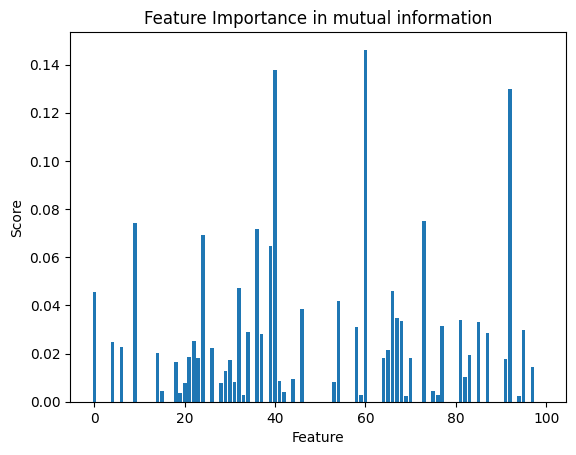

In [273]:
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=mutual_info_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.title('Feature Importance in mutual information')
pyplot.xlabel('Feature')
pyplot.ylabel('Score')
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Modeling With Selected Features

In [274]:
#
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.086


#### Model Built Using Correlation Features

In [275]:
# feature selection
# Running the example reports the performance of the model on just 10 of the 100 input features selected using the correlation statistic
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 2.740


In this case, we see that the model achieved an error score of about 2.7, which is much larger than the baseline model that used all features and achieved an MAE of 0.086.

This suggests that although the method has a strong idea of what features to select, building a model from these features alone does not result in a more skillful model. This could be because features that are important to the target are being left out, meaning that the method is being deceived about what is important

In [276]:

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=88)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.085


Let’s go the other way and try to use the method to remove some redundant features rather than all redundant features.

We can do this by setting the number of selected features to a much larger value, in this case, 88, hoping it can find and discard 12 of the 90 redundant features.

In this case, we can see that removing some of the redundant features has resulted in a small lift in performance with an error of about 0.085 compared to the baseline that achieved an error of about 0.086.

#### Model Built Using Mutual Information Features

In [277]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_regression, k=88)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.084


#### Tune the Number of Selected Features

In [283]:

X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -0.010
Best Config: {'sel__k': 81}
>-50.101 with: {'sel__k': 80}
>-0.010 with: {'sel__k': 81}
>-0.010 with: {'sel__k': 82}
>-0.010 with: {'sel__k': 83}
>-0.010 with: {'sel__k': 84}
>-0.010 with: {'sel__k': 85}
>-0.010 with: {'sel__k': 86}
>-0.010 with: {'sel__k': 87}
>-0.010 with: {'sel__k': 88}
>-0.010 with: {'sel__k': 89}
>-0.010 with: {'sel__k': 90}
>-0.011 with: {'sel__k': 91}
>-0.011 with: {'sel__k': 92}
>-0.011 with: {'sel__k': 93}
>-0.011 with: {'sel__k': 94}
>-0.011 with: {'sel__k': 95}
>-0.011 with: {'sel__k': 96}
>-0.011 with: {'sel__k': 97}
>-0.011 with: {'sel__k': 98}
>-0.011 with: {'sel__k': 99}
>-0.011 with: {'sel__k': 100}


>81 -0.082 (0.006)
>82 -0.082 (0.006)
>83 -0.082 (0.006)
>84 -0.082 (0.006)
>85 -0.082 (0.006)
>86 -0.082 (0.006)
>87 -0.082 (0.006)
>88 -0.082 (0.006)
>89 -0.083 (0.006)
>90 -0.083 (0.006)
>91 -0.083 (0.006)
>92 -0.083 (0.006)
>93 -0.083 (0.006)
>94 -0.083 (0.006)
>95 -0.083 (0.006)
>96 -0.083 (0.006)
>97 -0.083 (0.006)
>98 -0.083 (0.006)
>99 -0.083 (0.006)
>100 -0.083 (0.006)


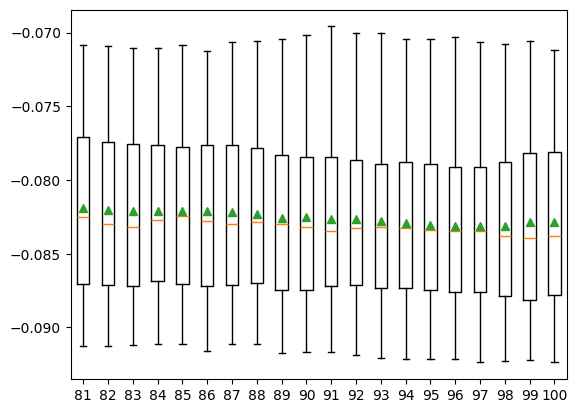

In [286]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-19, X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

Running the example grid searches different numbers of selected features using mutual information statistics, where each modeling pipeline is evaluated using repeated cross-validation

In this case, we can see that the best number of selected features is 81, which achieves a MAE of about 0.082 (ignoring the sign)

In this case, reporting the mean and standard deviation of MAE is not very interesting, other than values of k in the 80s appear better than those in the 90s.

Box and whisker plots are created side by side showing the trend of k vs. MAE where the green triangle represents the mean and orange line represents the median of the distribution.

### (c) The important decision here is to select the number of features k. Do this manually for both methods by running the code with k= 5, 10, 20, 30, 40, 50, 60, 70, 80, 90. Then draw the resulting errors depending on k. Which of the two methods seems to be better? Which k should we select?


In [302]:
def select_features_correlation(X_train, y_train, X_test, k):
	# selecting features using correlation
	fs = SelectKBest(score_func=f_regression, k=k)

    # training the model
	fs.fit(X_train, y_train)

    # transforming the data
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)

	return X_train_fs, X_test_fs, fs


def select_features_mutual_information(X_train, y_train, X_test, k):
    # selecting features using mutual information
    fs = SelectKBest(score_func=mutual_info_regression, k=k)

    # training the model
    fs.fit(X_train, y_train)

    # transforming the data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)

    return X_train_fs, X_test_fs, fs


def evaluate_model_mae(X_train, y_train, X_train_fs,  X_test, y_test, k, feature_selection_method):
    X_train_fs, X_test_fs, fs = feature_selection_method(X_train, y_train, X_test, k)

    model = LinearRegression()
    model.fit(X_train_fs, y_train)

    yhat = model.predict(X_test_fs)

    mae = mean_absolute_error(y_test, yhat)


    return mae


#### Without k-cross validation

In [318]:
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

k = [5, 10, 20, 30, 40, 50, 60, 70, 80 ,90]

mae_corr = {}
mae_mutual = {}


for value in k:
    mae_correlation = evaluate_model_mae(X_train, y_train, X_train_fs,  X_test, y_test, value, select_features_correlation)
    mae_mutual_information = evaluate_model_mae(X_train, y_train, X_train_fs,  X_test, y_test, value, select_features_mutual_information)

    mae_corr["k = " + str(value)] = mae_correlation
    mae_mutual["k = " + str(value)] = mae_mutual_information


feature_selection_methods = ['Correlation MAE', 'Mutual Information MAE']

fs_df = pd.DataFrame([mae_corr, mae_mutual], index=feature_selection_methods).T



In [319]:
fs_df.head(10)

,Correlation MAE,Mutual Information MAE
k = 5,68.227554,78.286641
k = 10,2.739756,68.209581
k = 20,2.804713,62.052093
k = 30,2.841973,44.961780
k = 40,2.888258,44.998534
k = 50,2.911277,17.030667
k = 60,2.932020,17.207767
k = 70,0.082455,0.082562
k = 80,0.085308,0.083306
k = 90,0.084999,0.083797


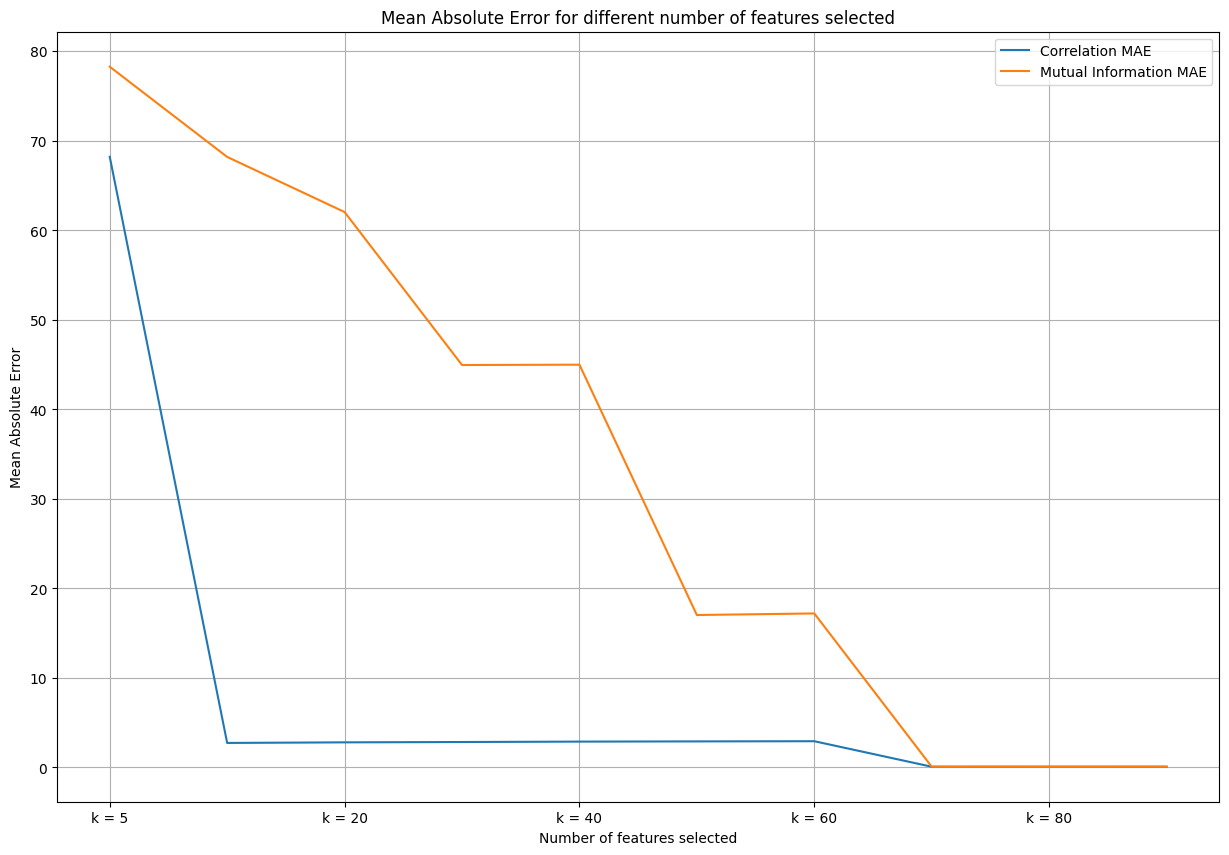

In [321]:
fs_df.plot(kind='line', figsize=(15, 10))
plt.xlabel('Number of features selected')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for different number of features selected')
plt.grid()

#### With k-cross validation

In [323]:
"""
Parameters:

X_train, y_train: Training data and labels.

X_test, y_test: Test data and labels.

k: Number of features to select.

feature_selection_method: Function used for feature selection (either correlation or mutual information).

cv: Cross-validation strategy.

Process:

1. Initializes an empty list mae_scores to hold MAE values from each fold.
2. Uses the provided cross-validation strategy (cv.split(X_train)) to create training and validation splits.
3. For each fold:
    - It retrieves the training and validation indices and creates corresponding subsets of data.
    - Applies the feature selection method to select the best k features from the training set.
    - Fits a LinearRegression model on the selected features of the training set.
    - Makes predictions on the validation set and calculates the MAE for that fold.
4. Finally, the function returns the average MAE across all folds.
"""

def evaluare_model_mae_with_k_cross_validation(X_train, y_train, X_test, y_test, k, feature_selection_method, cv):
    mae_scores = []

    for train_index, val_index in cv.split(X_train):
        X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
        y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]

        # Feature selection
        X_cv_train_fs, X_cv_val_fs, _ = feature_selection_method(X_cv_train, y_cv_train, X_cv_val, k)

        # Fit the model
        model = LinearRegression()
        model.fit(X_cv_train_fs, y_cv_train)

        # Make predictions and calculate MAE
        y_cv_pred = model.predict(X_cv_val_fs)
        mae_scores.append(mean_absolute_error(y_cv_val, y_cv_pred))

    # Average the MAE across all folds
    return np.mean(mae_scores)


In [326]:
# Load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Set up k values for feature selection
k_values = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90]

# Initialize cross-validation strategy
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Initialize dictionaries to store MAE results
mae_corr = {}
mae_mutual = {}

# Iterate over each k value
for k in k_values:
    # Evaluate MAE for correlation method
    mae_correlation = evaluare_model_mae_with_k_cross_validation(X_train, y_train, X_test, y_test, k, select_features_correlation, cv)

    # Evaluate MAE for mutual information method
    mae_mutual_information = evaluare_model_mae_with_k_cross_validation(X_train, y_train, X_test, y_test, k, select_features_mutual_information, cv)

    mae_corr[f"k = {k}"] = mae_correlation
    mae_mutual[f"k = {k}"] = mae_mutual_information

# Store results in DataFrame
fs_df_kcross = pd.DataFrame({
    'Correlation MAE': mae_corr,
    'Mutual Information MAE': mae_mutual
})


In [328]:
fs_df_kcross.head(10)

,Correlation MAE,Mutual Information MAE
k = 5,69.455997,90.990085
k = 10,3.673911,72.765184
k = 20,2.748953,60.736166
k = 30,2.762524,45.348877
k = 40,2.700935,33.068303
k = 50,2.273090,23.603846
k = 60,1.839105,17.588964
k = 70,1.278887,10.207900
k = 80,0.820585,10.331598
k = 90,0.359073,1.846402


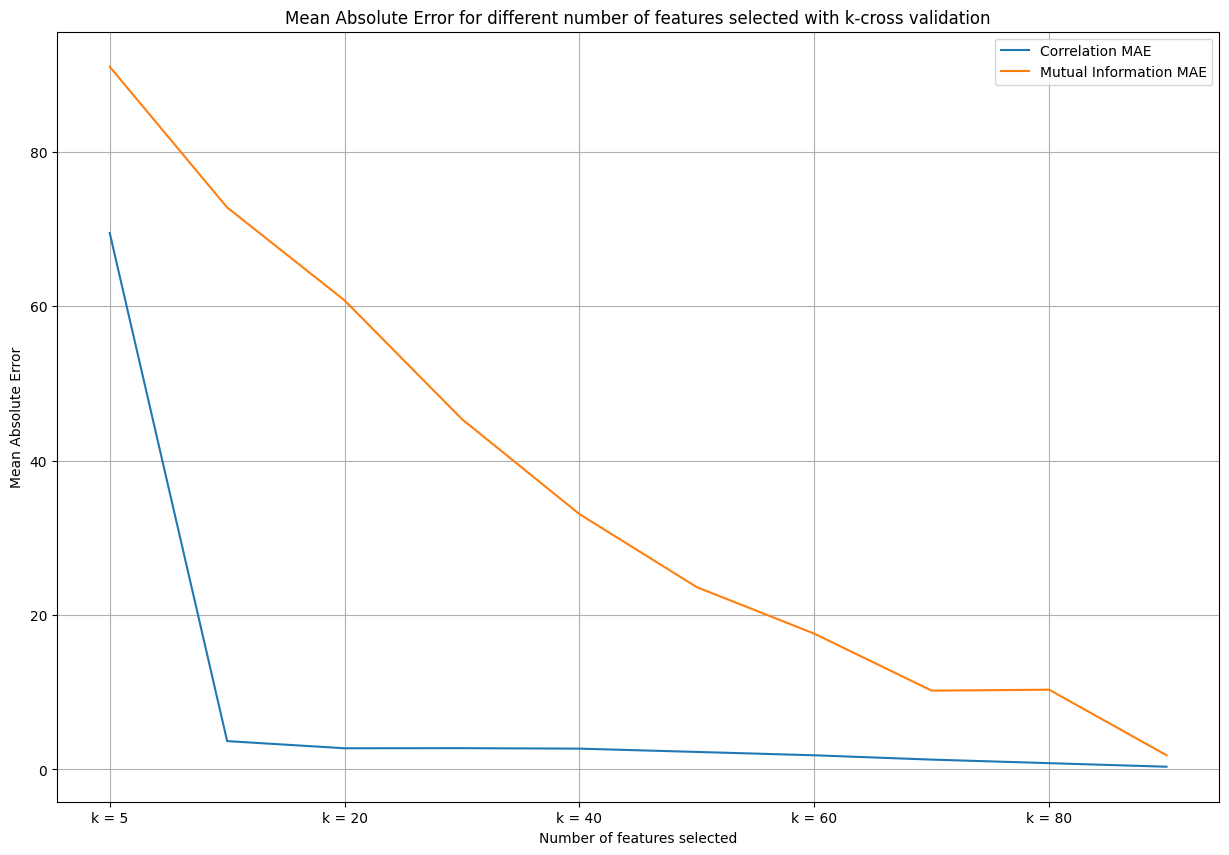

In [330]:
fs_df_kcross.plot(kind='line', figsize=(15, 10))
plt.xlabel('Number of features selected')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for different number of features selected with k-cross validation')
plt.grid()

# DP6 Feature generation for linear regression

Load the data dataFeatureGenerationForLinReg.csv. The first two columns are the input variables x1 and x2, the third is 
the outcome y which should be predicted from x1 and x2.


(a) Predict the outcome y from x1 and x2 using a purely linear model and assess the fit graphically.


(b) Predict the outcome y from x1 and x2 but now add polynomial terms to the linear model. Again assess the fit graphically.